# 07/17/20 - This notebook investigates the referee's suggestion to use Auger-2010's $\sigma_{e/2}-M_*$ relation.

In [2]:
# import libraries
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from astropy import constants as const
import astropy.units as u
from astropy.cosmology import FlatLambdaCDM, z_at_value

c = const.c.to('km/s').value #c in km/s
h0 = 73.8 #h0 in km/(Mpc*s) Riess2011
cosmo = FlatLambdaCDM(h0, Om0=0.262)

In [3]:
# set datapaths
png_path = '/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/PNGs/'
pdf_path = '/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/PDFs/'
csv_path = '/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/'

In [4]:
# import data
spec = pd.read_csv(f'{csv_path}spec_latest.csv')
mac = pd.read_csv(f'{csv_path}mac_latest.csv')
zoo = pd.read_csv(f'{csv_path}zoo_latest.csv')
li = pd.read_csv(f'{csv_path}li_lambdar.csv')

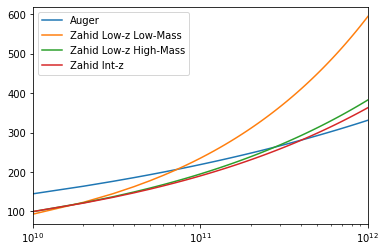

In [20]:
# compare velocity dispersions for each
M = np.linspace(10**10, 10**12, 100)

sigma_auger = 10**2.34 * (M/(10**11))**0.18

sigma_zahid_lowzlowmass = 10**2.073 * (M/(10**10.26))**0.403
sigma_zahid_lowzhighmass = 10**2.073 * (M/(10**10.26))**0.293
sigma_zahid_intz = 10**2.071 * (M/(10**10.26))**0.281

plt.plot(M, sigma_auger,
        label='Auger')
plt.plot(M, sigma_zahid_lowzlowmass,
        label='Zahid Low-z Low-Mass')
plt.plot(M, sigma_zahid_lowzhighmass,
        label='Zahid Low-z High-Mass')
plt.plot(M, sigma_zahid_intz,
        label='Zahid Int-z')
plt.xlim(10**10, 10**12)
#plt.xticks([10**10, 10**10.5, 10**11, 10**11.5, 10**12])
plt.xscale('log')
plt.legend()

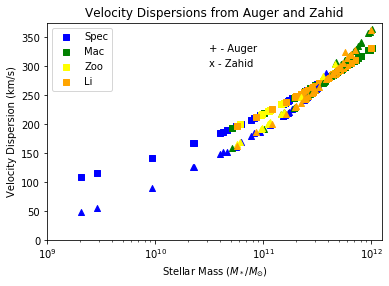

In [23]:
# compare velocity dispersions for candidates

spec['sigma_star_auger'] = 10**2.34 * (spec.lambdar_mstar/(10**11))**0.18
mac['sigma_star_auger'] = 10**2.34 * (mac.lambdar_mstar/(10**11))**0.18
zoo['sigma_star_auger'] = 10**2.34 * (zoo.lambdar_mstar/(10**11))**0.18
li['sigma_star_auger'] = 10**2.34 * (li.lambdar_mstar/(10**11))**0.18

# sigma auger
plt.scatter(spec.lambdar_mstar, spec.sigma_star_auger,
        label='Spec', 
        color='blue',
         marker='s')
plt.scatter(mac.lambdar_mstar, mac.sigma_star_auger,
        label='Mac', 
        color='green',
         marker='s')
plt.scatter(zoo.lambdar_mstar, zoo.sigma_star_auger,
        label='Zoo', 
        color='yellow',
         marker='s')
plt.scatter(li.lambdar_mstar, li.sigma_star_auger,
        label='Li', 
        color='orange',
         marker='s')
# sigma zahid
plt.scatter(spec.lambdar_mstar, spec.sigma_star,
#        label='Spec', 
        color='blue',
         marker='^')
plt.scatter(mac.lambdar_mstar, mac.sigma_star,
#        label='Mac', 
        color='green',
         marker='^')
plt.scatter(zoo.lambdar_mstar, zoo.sigma_star,
#        label='Zoo', 
        color='yellow',
         marker='^')
plt.scatter(li.lambdar_mstar, li.sigma_star,
 #       label='Li', 
        color='orange',
         marker='^')

plt.text(10**10.5, 325, '+ - Auger')
plt.text(10**10.5, 300, 'x - Zahid')

plt.xlim(10**9, 10**12.1)
plt.ylim(0, 375)
plt.xscale('log')
plt.xlabel('Stellar Mass ($M_*/M_{\odot}$)')
plt.ylabel('Velocity Dispersion (km/s)')
plt.title('Velocity Dispersions from Auger and Zahid')
plt.legend()

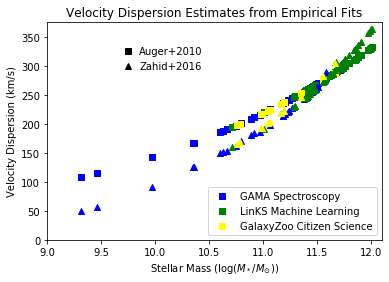

In [51]:
# sigma auger
plt.scatter(spec.lambdar_log_mstar, spec.sigma_star_auger,
        label='GAMA Spectroscopy', 
        color='blue',
         marker='s')
plt.scatter(mac.lambdar_log_mstar, mac.sigma_star_auger,
        label='LinKS Machine Learning', 
        color='green',
         marker='s')
plt.scatter(zoo.lambdar_log_mstar, zoo.sigma_star_auger,
        label='GalaxyZoo Citizen Science', 
        color='yellow',
         marker='s')
#plt.scatter(li.lambdar_log_mstar, li.sigma_star_auger,
#        label='Li+2020 Bright Galaxies', 
#        color='orange',
#         marker='s')
# sigma zahid
plt.scatter(spec.lambdar_log_mstar, spec.sigma_star,
#        label='Spec', 
        color='blue',
         marker='^')
plt.scatter(mac.lambdar_log_mstar, mac.sigma_star,
#        label='Mac', 
        color='green',
         marker='^')
plt.scatter(zoo.lambdar_log_mstar, zoo.sigma_star,
#        label='Zoo', 
        color='yellow',
         marker='^')
#plt.scatter(li.lambdar_log_mstar, li.sigma_star,
 #       label='Li', 
#        color='orange',
#         marker='^')

plt.plot(9.75, 325, 's', color='k')
plt.plot(9.75, 300, '^', color='k')
plt.text(9.85, 320, 'Auger+2010')
plt.text(9.85, 295, 'Zahid+2016')

plt.xlim(9, 12.1)
plt.ylim(0, 375)
#plt.xscale('log')
plt.xlabel('Stellar Mass ($\log(M_*/M_{\odot}$))')
plt.ylabel('Velocity Dispersion (km/s)')
plt.title('Velocity Dispersion Estimates from Empirical Fits')
plt.legend()

plt.savefig(f'{pdf_path}velocity_dispersion_augervszahid.pdf')

/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib

Text(1.325, 12.4, '2 PSF')

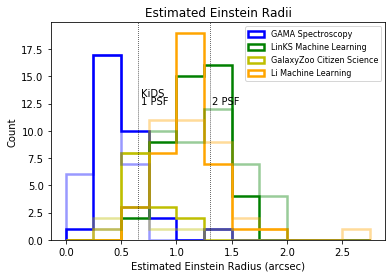

In [48]:
# now let's do the theta e estimates
spec['theta_e_veldisp_auger'] = 206265 * 4 * np.pi * (spec.sigma_star_auger)**2 * (spec.D_source - spec.D_lens) / (spec.D_source * c**2)
mac['theta_e_veldisp_auger'] = 206265 * 2 * np.pi * (mac.sigma_star_auger)**2 / c**2
zoo['theta_e_veldisp_auger'] = 206265 * 2 * np.pi * (zoo.sigma_star_auger)**2 / c**2
li['theta_e_veldisp_auger'] = 206265 * 2 * np.pi * (li.sigma_star_auger)**2 / c**2

# Histogram of Einstein Radii
plt.xlabel("Estimated Einstein Radius (arcsec)")
plt.ylabel("Count")
plt.title("Estimated Einstein Radii")

#plt.ylim(0,14.5)

plt.hist(spec.theta_e_veldisp_auger, bins=11, range=[0.0,2.75],
         color='b',label='GAMA Spectroscopy', 
         histtype = 'step', linewidth=2.5)
plt.hist(mac.theta_e_veldisp_auger,bins=11,range=[0.0,2.75],
         color='g',label='LinKS Machine Learning', 
         histtype = 'step', linewidth=2.5)
plt.hist(zoo.theta_e_veldisp_auger,bins=11,range=[0.0,2.75],
         color='y',label='GalaxyZoo Citizen Science', 
         histtype = 'step', linewidth=2.5)
plt.hist(li.theta_e_veldisp_auger,bins=11,range=[0.0,2.75],
         color='orange',label='Li Machine Learning', 
         histtype = 'step', linewidth=2.5)

plt.hist(spec.theta_e_sis,bins=11,range=[0.0,2.75],
         color='b',#label='GAMA Spectroscopy', 
         histtype = 'step', linewidth=2.5, alpha = 0.4)
plt.hist(mac.theta_e_sis,bins=11,range=[0.0,2.75],
         color='g',#label='LinKS Machine Learning', 
         histtype = 'step', linewidth=2.5, alpha = 0.4)
plt.hist(zoo.theta_e_sis,bins=11,range=[0.0,2.75],
         color='y',#label='GalaxyZoo Citizen Science', 
         histtype = 'step', linewidth=2.5, alpha = 0.4)
plt.hist(li.theta_e_sis,bins=11,range=[0.0,2.75],
         color='orange',#label='Li Machine Learning', 
         histtype = 'step', linewidth=2.5, alpha = 0.4)
plt.legend(loc='upper right', fontsize=8)

plt.axvline(0.65, color='k', linestyle='dotted', linewidth=0.75)
plt.axvline(1.3, color='k', linestyle='dotted', linewidth=0.75)
#plt.axvline(1.95, color='k', linestyle='dashed', linewidth=1)
#plt.axvline(1, color='b', linestyle='solid', linewidth=1)
#plt.axvline(1, color='g', linestyle='dashed', linewidth=1)
#plt.axvline(0.1, color='k', linestyle='dashed', linewidth=0.75)
#plt.axvline(0.2, color='k', linestyle='dashed', linewidth=0.75)


plt.text(0.675, 12.4, '1 PSF')
plt.text(0.675, 13.2, 'KiDS')
plt.text(1.325, 12.4, '2 PSF')
#plt.text(-0.06, 13.2, '0.1-0.2 arcsec')
#plt.text(0.125, 13.2, 'JWST')
#plt.text(0.125, 12.4, 'Euclid')
#plt.text(2, 11, '3 PSF')
#plt.text(1.05, 12, 'GAMA aperture', color='b', fontsize=8)
#plt.text(1.05, 13, 'minimum from training set Petrillo-2019', color = 'g', fontsize=8)
#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/PNGs/theta_e_veldisp_062620.png')
#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/Final_PDFs_for_Paper/theta_e_060920..pdf')


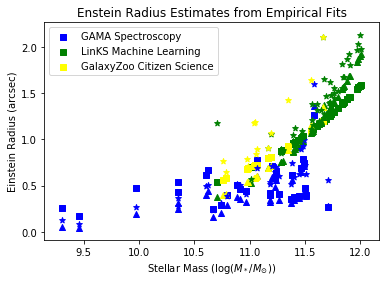

In [63]:

plt.scatter(spec.lambdar_log_mstar, spec.theta_e_veldisp_auger,
        label='GAMA Spectroscopy', 
        color='blue',
         marker='s')
plt.scatter(mac.lambdar_log_mstar, mac.theta_e_veldisp_auger,
        label='LinKS Machine Learning', 
        color='green',
         marker='s')
plt.scatter(zoo.lambdar_log_mstar, zoo.theta_e_veldisp_auger,
        label='GalaxyZoo Citizen Science', 
        color='yellow',
         marker='s')
#plt.scatter(li.lambdar_log_mstar, li.theta_e_veldisp_auger,
#        label='Li+2020 Bright Galaxies', 
#        color='orange',
#         marker='s')
# sigma zahid
plt.scatter(spec.lambdar_log_mstar, spec.theta_e_sis,
#        label='Spec', 
        color='blue',
         marker='^')
plt.scatter(mac.lambdar_log_mstar, mac.theta_e_sis,
#        label='Mac', 
        color='green',
         marker='^')
plt.scatter(zoo.lambdar_log_mstar, zoo.theta_e_sis,
#        label='Zoo', 
        color='yellow',
         marker='^')
#plt.scatter(li.lambdar_log_mstar, li.theta_e_veldisp_zahid,
 #       label='Li', 
#        color='orange',
#         marker='^')
plt.scatter(spec.lambdar_log_mstar, spec.theta_e_pm,
#        label='Spec', 
        color='blue',
         marker='*')
plt.scatter(mac.lambdar_log_mstar, mac.theta_e_pm,
#        label='Mac', 
        color='green',
         marker='*')
plt.scatter(zoo.lambdar_log_mstar, zoo.theta_e_pm,
#        label='Zoo', 
        color='yellow',
         marker='*')

#plt.plot(9.75, 325, 's', color='k')
#plt.plot(9.75, 300, '^', color='k')
#plt.text(9.85, 320, 'Auger+2010')
#plt.text(9.85, 295, 'Zahid+2016')

#plt.xlim(9, 12.1)
#plt.ylim(0, 375)
#plt.xscale('log')
plt.xlabel('Stellar Mass ($\log(M_*/M_{\odot}$))')
plt.ylabel('Einstein Radius (arcsec)')
plt.title('Enstein Radius Estimates from Empirical Fits')
plt.legend()

#plt.savefig(f'{pdf_path}velocity_dispersion_augervszahid.pdf')

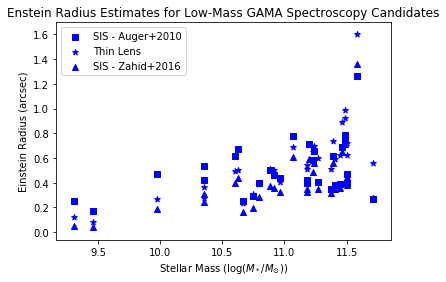

In [64]:
# show only the low mass candidates (GAMA spec)
plt.scatter(spec.lambdar_log_mstar, spec.theta_e_veldisp_auger,
        label='SIS - Auger+2010', 
        color='blue',
         marker='s')
plt.scatter(spec.lambdar_log_mstar, spec.theta_e_pm,
        label='Thin Lens', 
        color='blue',
         marker='*')
plt.scatter(spec.lambdar_log_mstar, spec.theta_e_sis,
        label='SIS - Zahid+2016', 
        color='blue',
         marker='^')
plt.xlabel('Stellar Mass ($\log(M_*/M_{\odot}$))')
plt.ylabel('Einstein Radius (arcsec)')
plt.title('Enstein Radius Estimates for Low-Mass GAMA Spectroscopy Candidates')
plt.legend()

#plt.savefig(f'{pdf_path}velocity_dispersion_augervszahid.pdf')

In [1]:
plt.hist(spec.theta_e_pm, bins=11, range=[0.0,2.75],
         color='b',label='GAMA Spectroscopy', 
         histtype = 'step', linewidth=2.5)
plt.hist(mac.theta_e_pm,bins=11,range=[0.0,2.75],
         color='g',label='LinKS Machine Learning', 
         histtype = 'step', linewidth=2.5)
plt.hist(zoo.theta_e_pm,bins=11,range=[0.0,2.75],
         color='y',label='GalaxyZoo Citizen Science', 
         histtype = 'step', linewidth=2.5)
plt.hist(li.theta_e_pm,bins=11,range=[0.0,2.75],
         color='orange',label='Li Machine Learning', 
         histtype = 'step', linewidth=2.5)


NameError: name 'plt' is not defined

In [48]:
slacs = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/slacs_Auger2009.csv')

In [53]:
slacs.log_Mstellar_M_sun_Chab.describe()

count    76.000000
mean     11.329737
std       0.245634
min      10.430000
25%      11.200000
50%      11.355000
75%      11.480000
max      11.790000
Name: log_Mstellar_M_sun_Chab, dtype: float64

In [54]:
slacs.columns

Index(['Unnamed: 0', 'Name', 'zlens', 'zsrc', 'rEin(kpc)', 'log_MEin_M_sun',
       'fChab\nstellarEin', 'f∗Ein', 'stellarEinfstellareff',
       'log_Mstellar_M_sun_Chab', 'error_of_mass_chab',
       'log_Mstellar_M_sun__Salpeter', 'error_of_mass_sal', 'MB', 'MV', 'MB0',
       'MV0', 'stellar_mass_chabrier', 'theta_e_chabrier'],
      dtype='object')

In [56]:
slacs[ ['log_Mstellar_M_sun_Chab', 'stellar_mass_chabrier'] ]

,log_Mstellar_M_sun_Chab,stellar_mass_chabrier
0,11.38,2.398833e+11
1,11.33,2.137962e+11
2,11.48,3.019952e+11
3,11.23,1.698244e+11
4,NaN,NaN
...,...,...
80,11.47,2.951209e+11
81,11.35,2.238721e+11
82,11.48,3.019952e+11
83,NaN,NaN


In [60]:
zoo[zoo['GAMA_ID']==136604].theta_e_veldisp_auger

8    1.19657
Name: theta_e_veldisp_auger, dtype: float64

In [53]:
spec.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'GAMA_ID', 'RA', 'DEC', 'z_lens',
       'D_lens', 'D_source', 'magphys_mstar', 'lambdar_log_mstar',
       'lambdar_mstar', 'lambdar_log_mstar_error', 'm_half_re', 'sigma_star',
       'theta_e_pm', 'theta_e_sis', 'sigma_star_auger',
       'theta_e_veldisp_auger'],
      dtype='object')